# Twitter 사용자 감성 분석 #



<br><br>


**Twitter 사용자들의 감정을 분석해봅니다**

- Twitter API를 등록하고
- 분석에 필요한 모듈(tweepy, textblop)등을 받은후에
- Twit들을 분석해 사죵자들의 감정을 분석해봅니다


In [3]:
from textblob import TextBlob
import nltk
import tweepy
import config
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 커스터머키
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
# 엑세스토큰
access_token = config.access_token
access_token_secret = config.access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
public_tweets = api.search('MLB', len='en', count=100)

positive_polarity_count=0
negative_polarity_count=0
netural_polarity_count=0
subjectivity_count=0


for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    
    if analysis.sentiment.polarity < 0:
        negative_polarity_count += 1
    elif analysis.sentiment.polarity:
        netural_polarity_count += 1
    else:
        positive_polarity_count += 1
    subjectivity_count += 1
    
    print(analysis.sentiment)
    print('-'*70)
print("Average of Twitt in 'MLB' negatve is :", negative_polarity_count, "%")
print("Average of Twitt in 'MLB' positive is :", positive_polarity_count, "%")
print("Average of Twitt in 'MLB' netural is :", netural_polarity_count, "%")
print("Average of Twitt in 'MLB' subjectivity is :",subjectivity_count, "%")

Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.3181818181818182, subjectivity=0.4772727272727273)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.45, subjectivity=0.65)
----------------------------------------------------------------------
Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
----------------------------------------------------------------------
Sentiment(polarity=0.21428571428571427, subjectivity=0.5)
----------------------------------------------------------------------
Sentiment(polarity=0.2, subjectivity=0.6)
----------------------------------------------------------------------
Sentiment(polarity=-0.16875, subjectivity=0.6)
----------------------------------------------------------------------
Sentiment(p

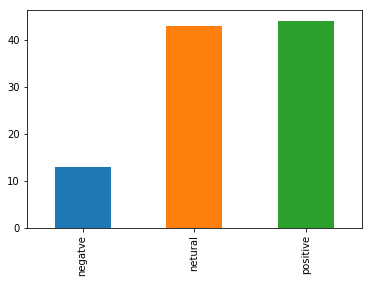

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.DataFrame([{'negatve' : negative_polarity_count,
                   'positive' : positive_polarity_count,
                   'netural' : netural_polarity_count,}])

df.mean().plot(kind='bar')